###**IMPORTING DATASET**

In [65]:
from google.colab import files
files.upload()

Saving adult.csv to adult (1).csv


{'adult (1).csv': b'age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income\r\n25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K\r\n38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K\r\n28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K\r\n44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K\r\n18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K\r\n34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K\r\n29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K\r\n63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Pro

###**VIEWING DATA**

In [66]:
import pandas as pd

In [67]:
df = pd.read_csv('adult.csv')
df.head(10)

age         workclass  fnlwgt  ... hours-per-week  native-country income
0   25           Private  226802  ...             40   United-States  <=50K
1   38           Private   89814  ...             50   United-States  <=50K
2   28         Local-gov  336951  ...             40   United-States   >50K
3   44           Private  160323  ...             40   United-States   >50K
4   18                 ?  103497  ...             30   United-States  <=50K
5   34           Private  198693  ...             30   United-States  <=50K
6   29                 ?  227026  ...             40   United-States  <=50K
7   63  Self-emp-not-inc  104626  ...             32   United-States   >50K
8   24           Private  369667  ...             40   United-States  <=50K
9   55           Private  104996  ...             10   United-States  <=50K

[10 rows x 15 columns]

In [68]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


###**DEALING WITH QUESTION MARKS**

In [70]:
df.replace(' ?',pd.NA,inplace=True)

###**CREATING TARGET VARIABLES**

In [71]:
x = df.drop(columns='income',axis=1)
y = df['income']

###**SPLITTING NUMERICAL AND CATEGORICAL DATA**

In [72]:
categorical_data = x.select_dtypes(include=['object']).columns
numerical_data = x.select_dtypes(exclude=['object']).columns

###**BUILDING PIPELINES**

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [74]:
num_pipeline = Pipeline([('imputer',SimpleImputer(strategy='median')),('scaler',StandardScaler())])

In [75]:
cat_pipeline = Pipeline([('imputer',SimpleImputer(strategy = 'constant',fill_value='unknown')),
                         ('ohe',OneHotEncoder(handle_unknown='ignore'))])

###**COLUMN TRANSFORMATION**

In [76]:
from sklearn.compose import ColumnTransformer

In [77]:
preprocessing = ColumnTransformer([('num',num_pipeline,numerical_data),
                                   ('cat',cat_pipeline,categorical_data)])


###**FITTING**

In [78]:
x_preprocessed = preprocessing.fit_transform(x)

In [79]:
x_preprocessed.shape

(48842, 108)

###**CONVERSION TO DATA FRAME**

In [80]:
feature_names = preprocessing.get_feature_names_out()
x_df = pd.DataFrame(x_preprocessed.toarray(),columns=feature_names)
x_df.head()

num__age  ...  cat__native-country_Yugoslavia
0 -0.995129  ...                             0.0
1 -0.046942  ...                             0.0
2 -0.776316  ...                             0.0
3  0.390683  ...                             0.0
4 -1.505691  ...                             0.0

[5 rows x 108 columns]

###**IMPORTING ON JOBLIB**

In [81]:
import joblib
joblib.dump(preprocessing,'preprocessing.pk1')
joblib.dump(x_preprocessed,'x_preprocessed.pk1')

['x_preprocessed.pk1']

#**EXPLORATORY DATA ANALYSIS**

####STRUCTURAL ANALYSIS

In [82]:
df.shape

(48842, 15)

In [83]:
df.describe()

age        fnlwgt  ...  capital-loss  hours-per-week
count  48842.000000  4.884200e+04  ...  48842.000000    48842.000000
mean      38.643585  1.896641e+05  ...     87.502314       40.422382
std       13.710510  1.056040e+05  ...    403.004552       12.391444
min       17.000000  1.228500e+04  ...      0.000000        1.000000
25%       28.000000  1.175505e+05  ...      0.000000       40.000000
50%       37.000000  1.781445e+05  ...      0.000000       40.000000
75%       48.000000  2.376420e+05  ...      0.000000       45.000000
max       90.000000  1.490400e+06  ...   4356.000000       99.000000

[8 rows x 6 columns]

In [84]:
df.describe(include='object')

workclass education      marital-status  ... gender native-country income
count      48842     48842               48842  ...  48842          48842  48842
unique         9        16                   7  ...      2             42      2
top      Private   HS-grad  Married-civ-spouse  ...   Male  United-States  <=50K
freq       33906     15784               22379  ...  32650          43832  37155

[4 rows x 9 columns]

In [85]:
df.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [86]:
df['income'].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

####MISSING VALUES DEEP DIVE

In [87]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [88]:
df.isna().mean().sort_values(ascending=False)

age                0.0
workclass          0.0
fnlwgt             0.0
education          0.0
educational-num    0.0
marital-status     0.0
occupation         0.0
relationship       0.0
race               0.0
gender             0.0
capital-gain       0.0
capital-loss       0.0
hours-per-week     0.0
native-country     0.0
income             0.0
dtype: float64

####UNIVARIATE ANALYSIS

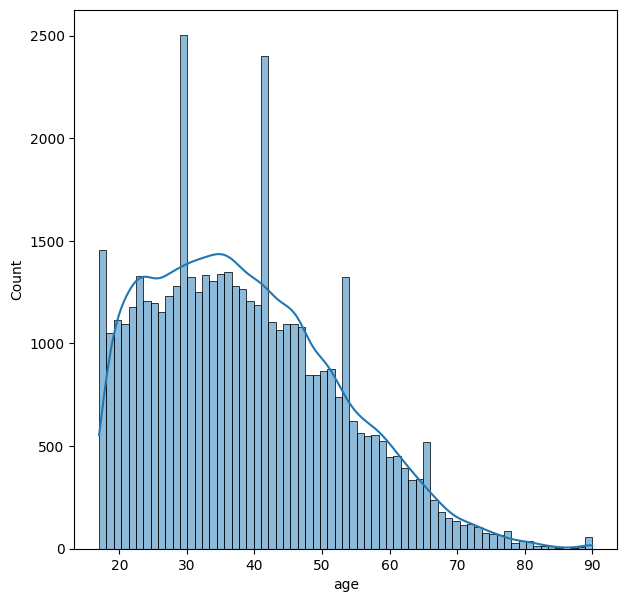

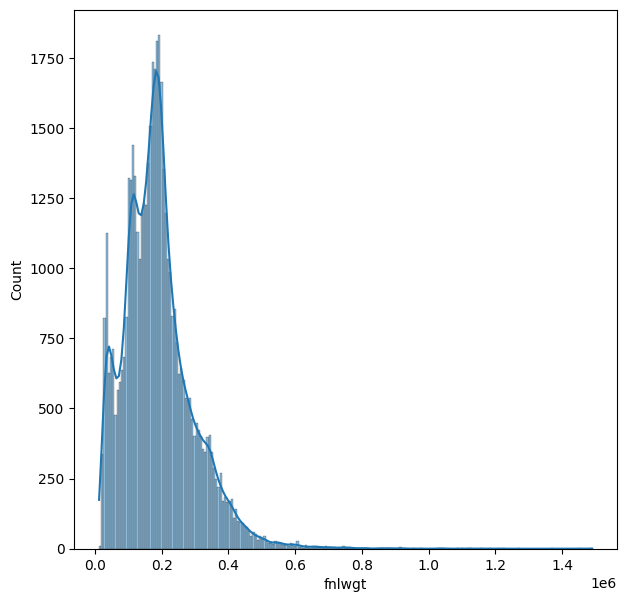

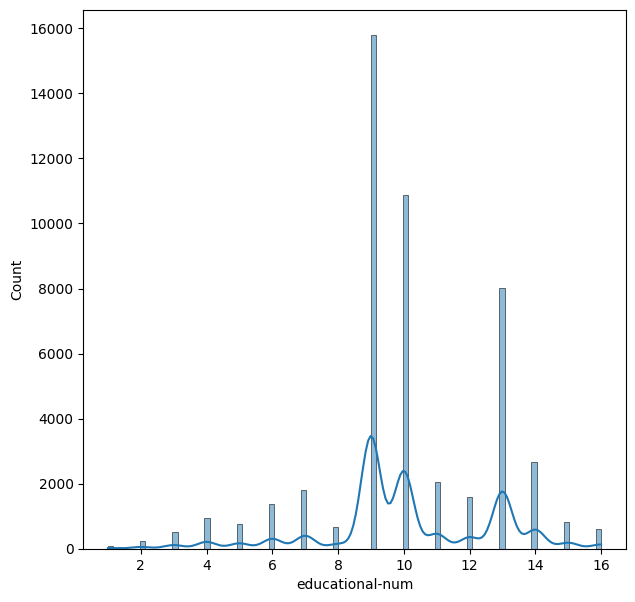

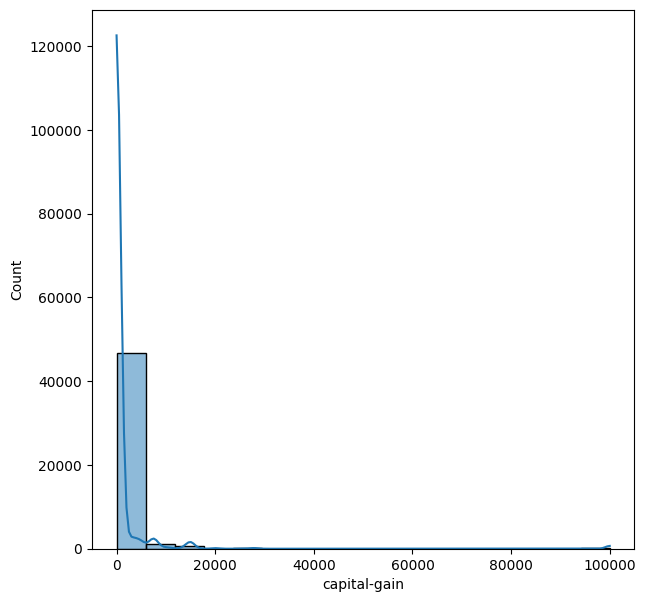

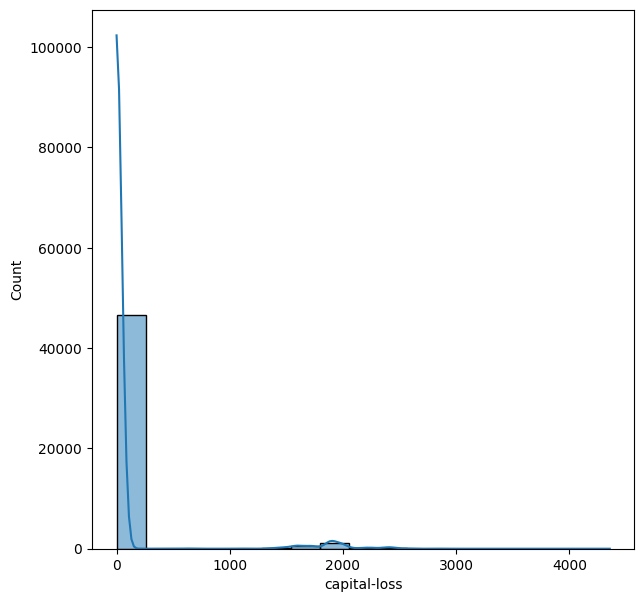

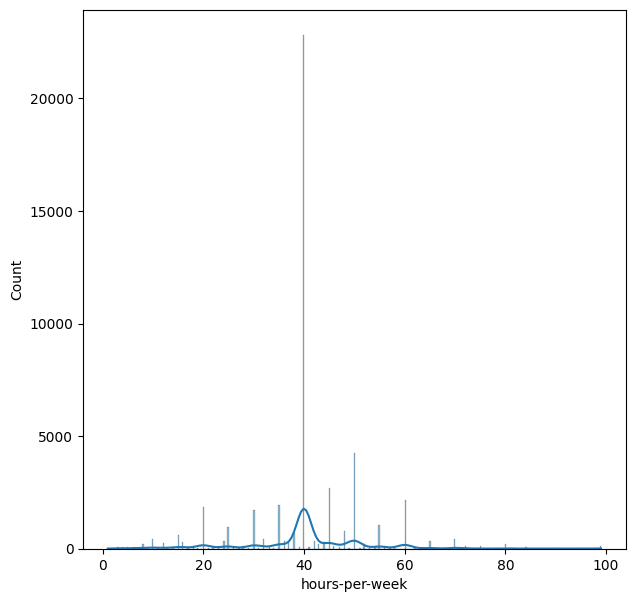

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numerical_data:
    plt.figure(figsize=(7,7))
    sns.histplot(df[col],kde=True)
    plt.show()

In [90]:
df['capital-gain'].mode()

0    0
Name: capital-gain, dtype: int64

In [91]:
df['capital-loss'].mode()

0    0
Name: capital-loss, dtype: int64

In [92]:
df['fnlwgt'].mode()

0    203488
Name: fnlwgt, dtype: int64

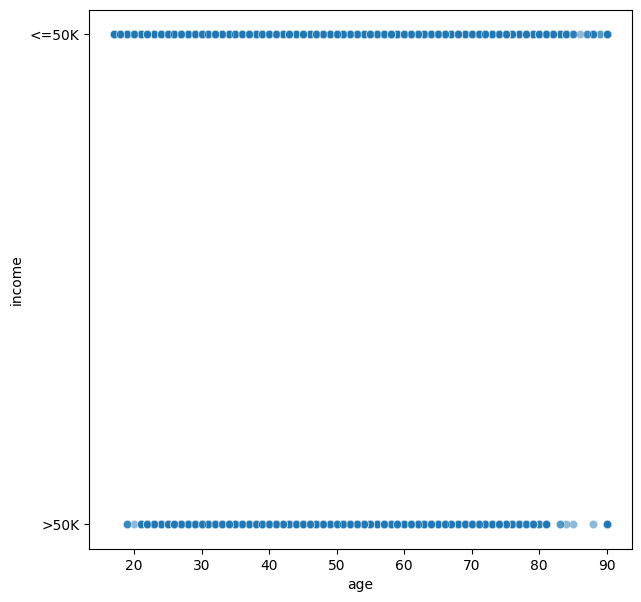

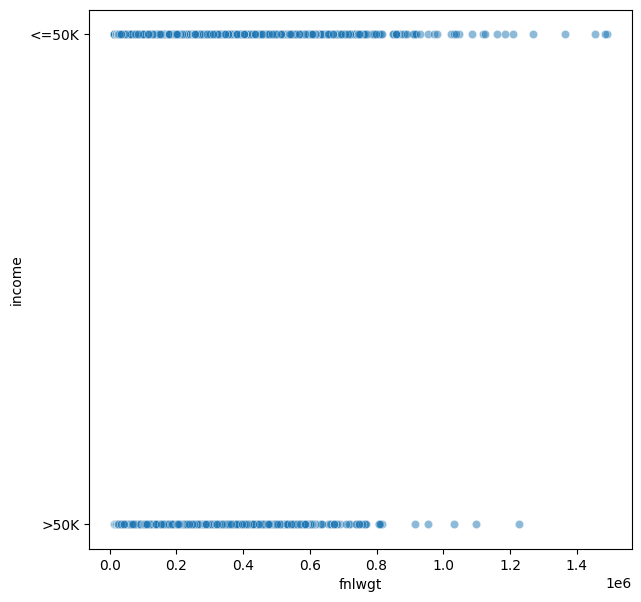

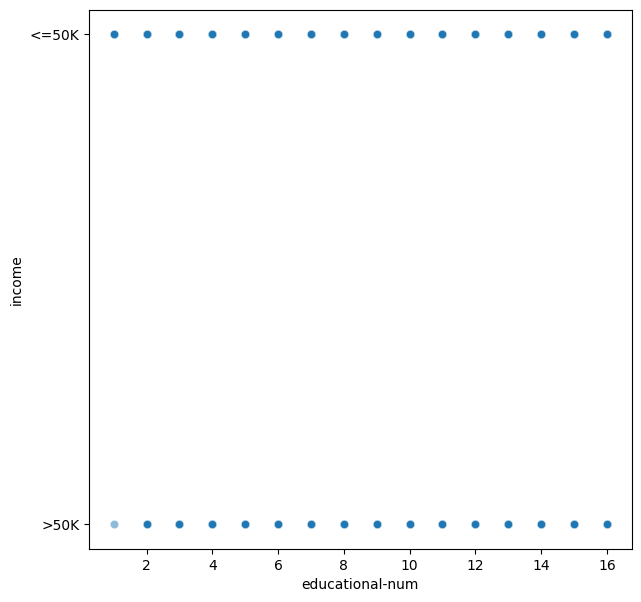

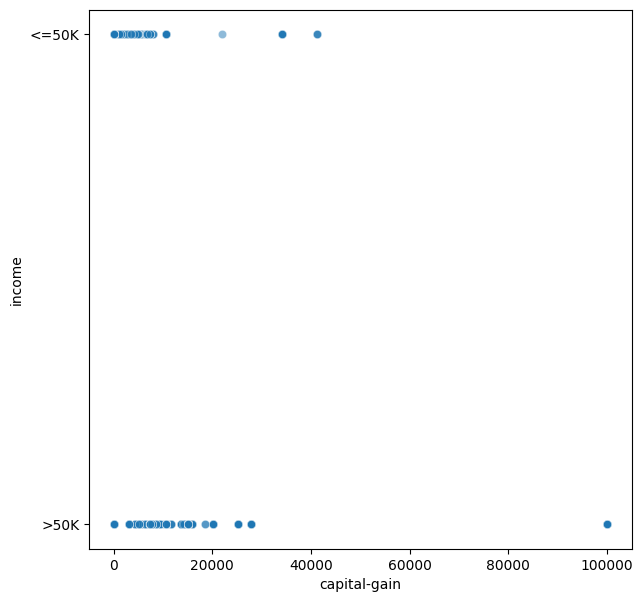

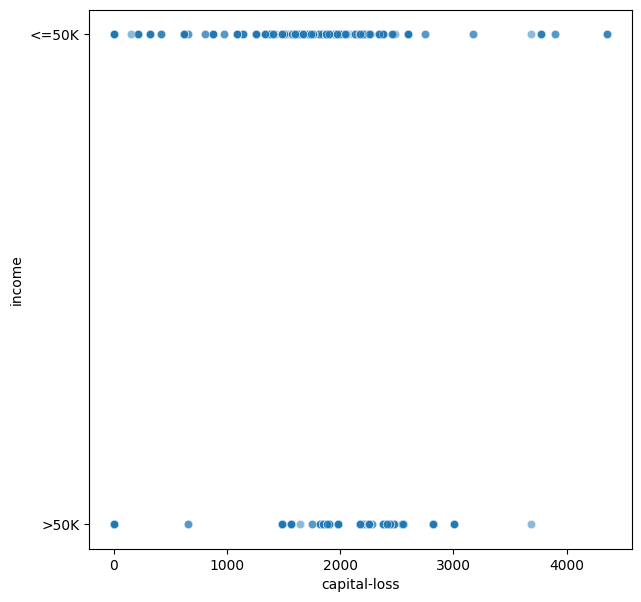

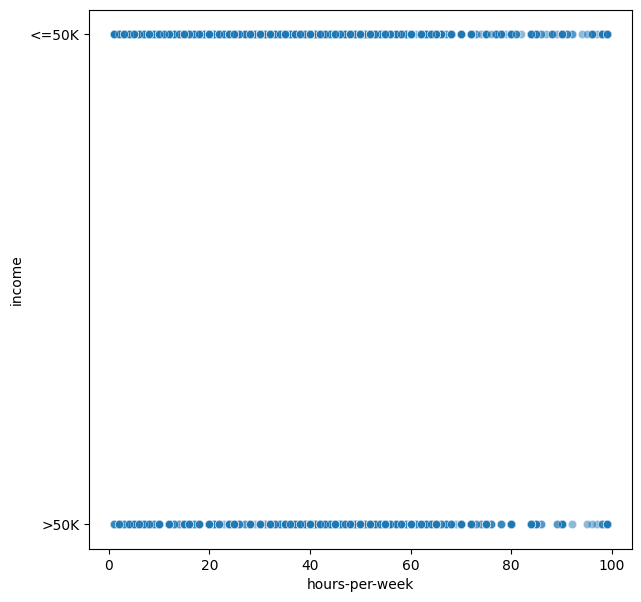

In [93]:
for col in numerical_data:
    plt.figure(figsize=(7,7))
    sns.scatterplot(x=df[col], y=df['income'], alpha=0.5)
    plt.show()

In [94]:
for col in categorical_data:
    print(df[col].value_counts().head(20))

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64
marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64
occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      

In [95]:
for col in categorical_data:
    print(col)
    print(pd.crosstab(df[col],df['income'],normalize='index'))

workclass
income               <=50K      >50K
workclass                           
?                 0.905323  0.094677
Federal-gov       0.608240  0.391760
Local-gov         0.704401  0.295599
Never-worked      1.000000  0.000000
Private           0.782133  0.217867
Self-emp-inc      0.446608  0.553392
Self-emp-not-inc  0.721129  0.278871
State-gov         0.732458  0.267542
Without-pay       0.904762  0.095238
education
income           <=50K      >50K
education                       
10th          0.937365  0.062635
11th          0.949227  0.050773
12th          0.926941  0.073059
1st-4th       0.967611  0.032389
5th-6th       0.946955  0.053045
7th-8th       0.935079  0.064921
9th           0.945767  0.054233
Assoc-acdm    0.742036  0.257964
Assoc-voc     0.746725  0.253275
Bachelors     0.587165  0.412835
Doctorate     0.274411  0.725589
HS-grad       0.841422  0.158578
Masters       0.450884  0.549116
Preschool     0.987952  0.012048
Prof-school   0.260192  0.739808
Some-college

####OUTILIER IDENTIFICATION

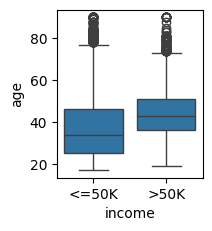

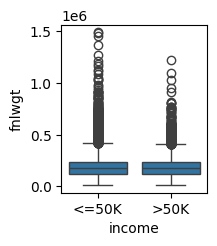

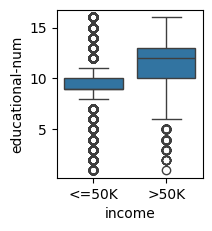

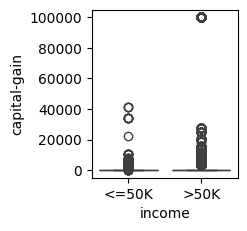

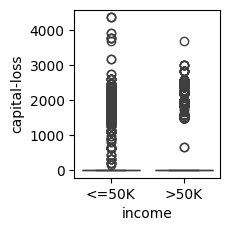

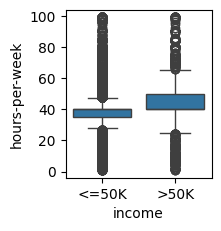

In [96]:
for i in range(len(numerical_data)):
    plt.subplot(2,3,i+1)
    sns.boxplot(data=df,x='income',y=numerical_data[i])
    plt.show()

####CORRELATION ANALYSIS

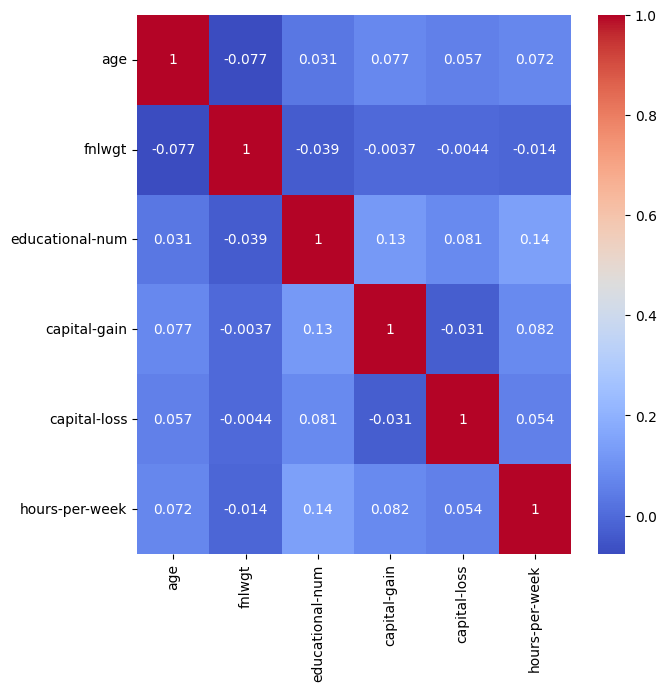

In [97]:
plt.figure(figsize=(7,7))
sns.heatmap(df[numerical_data].corr(),annot=True,cmap='coolwarm')
plt.show()

####CATEGORICAL MUTUAL INFORMATION EXTRACTION

In [98]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(x[categorical_data].apply(lambda col: col.factorize()[0]),y)
pd.Series(mi,index=categorical_data).sort_values(ascending=False)

relationship      0.116744
marital-status    0.111489
education         0.065816
occupation        0.064476
gender            0.030175
workclass         0.020091
race              0.015375
native-country    0.006360
dtype: float64

#**CONCLUSIONS**

*What columns have missing values?*
Given that all the columns and the data was imputed in the preprocessing pipeline, no columns with missing data was detected during EDA

*Which numerical columns have outliers?*
According the sns boxplot drawn, all the numerical columns have outliers, namely
age,fnlwgt,capital gains,capital losses,hours of work,educational num. From the graphs, it can be estimated that hours of work and fnlwgt are the categories which have the highest number of outliers

*Which categorical values dominate?*
From the categorical data classification data, we can say that relationship and marital status are the categorical data which dominates and has the highest correlation with the target income.

*Which features are almost useless?*
From the given data, we can see that native country and race are having very low correlation scores. Also from the scatterplots and boxplots we can also say that fnlwgt and hours of work also have quite a lot of outliers. So it is difficult to use them i think.

*How imbalanced is the target?*
From value_counts() of income we can say that around 24% of entries is >50k while the rest is < 50k thus the target is very imbalanced, which is the natural occurance.

Should “fnlwgt” be kept or removed? (Your call — justify it.)
This is a tough call but i will say that given how wierd the fnlwgt data looks in the histogram with a humongous central maxima with multiple high maximas in the bulk, then with its boxplot showing a huge number of outliers and also its scatterplot showing an equally high number of outliers, it will still not be justified to remove it without actually fitting the data into a model.

#**MODEL TRAINING + EVALUATION**

####TRAIN TEST SPLIT

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

####CREATING MODEL PIPELINES

In [120]:
from sklearn.linear_model import LogisticRegression
log_reg_clf = Pipeline([
    ('preprocessing',preprocessing),
    ('model',LogisticRegression(class_weight='balanced',random_state=42,solver='saga'))
])
rand_forest_clf = Pipeline([
    ('preprocessing',preprocessing),
    ('model',RandomForestClassifier(n_estimators=300,max_depth=6,random_state=42,n_jobs=-1))])

####FITTING MODELS

In [121]:
log_reg_clf.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object'))])),
                ('model',
                 LogisticRegression(class_weight='balanced', random_state=42,
                                    solver='saga'))])

In [122]:
rand_forest_clf.fit(x_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object'))])),
                ('model',
                 RandomForestClassifier(max_depth=6, n_estimators=300,
                                        n_jobs=-1, random_state=42))])

####MODEL EVALUATION

In [133]:
from sklearn.metrics import f1_score,recall_score,precision_score,accuracy_score,confusion_matrix,classification_report
def model_evaluation(model,x_test,y_test,model_name="Model"):
    prediction = model.predict(x_test)
    f1 = f1_score(y_test,prediction,pos_label='>50K')
    accuracy = accuracy_score(y_test,prediction)
    precision = precision_score(y_test,prediction,pos_label='>50K')
    recall = recall_score(y_test,prediction,pos_label='>50K')
    print(f'{model_name} performance')
    print(f'Accuracy : {accuracy:.4f}')
    print(f'Precision : {precision:.4f}')
    print(f'Recall : {recall:.4f}')
    print(f'F1 Score : {f1:.4f}')
    print('Classification Report')
    print(classification_report(y_test,prediction))
    cm = confusion_matrix(y_test,prediction)
    plt.figure(figsize=(7,7))
    sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['<50K','>50K'],yticklabels=['<50K','>50K'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.show()

Logistic Regression performance
Accuracy : 0.8161
Precision : 0.5720
Recall : 0.8555
F1 Score : 0.6856
Classification Report
              precision    recall  f1-score   support

       <=50K       0.95      0.80      0.87      7479
        >50K       0.57      0.86      0.69      2290

    accuracy                           0.82      9769
   macro avg       0.76      0.83      0.78      9769
weighted avg       0.86      0.82      0.83      9769



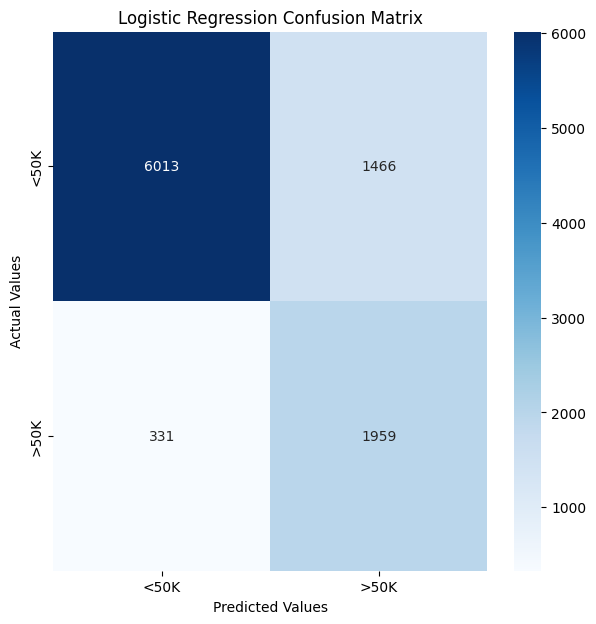

In [134]:
model_evaluation(log_reg_clf,x_test,y_test,'Logistic Regression')

Random Forest performance
Accuracy : 0.8477
Precision : 0.7902
Recall : 0.4769
F1 Score : 0.5948
Classification Report
              precision    recall  f1-score   support

       <=50K       0.86      0.96      0.91      7479
        >50K       0.79      0.48      0.59      2290

    accuracy                           0.85      9769
   macro avg       0.82      0.72      0.75      9769
weighted avg       0.84      0.85      0.83      9769



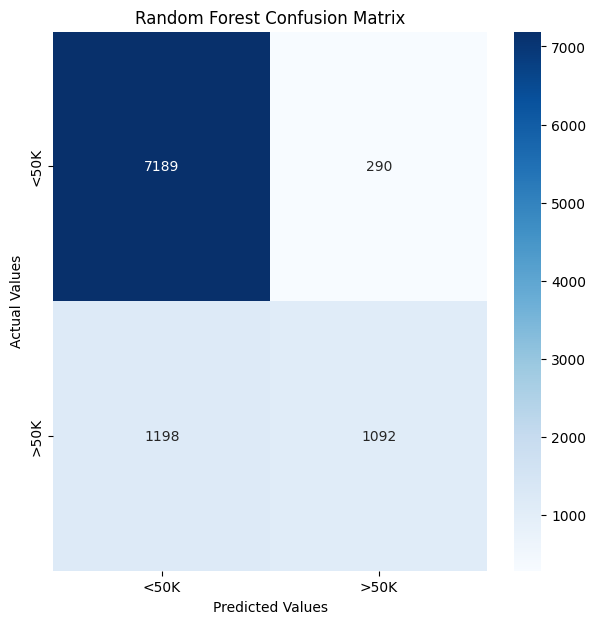

In [125]:
model_evaluation(rand_forest_clf,x_test,y_test,'Random Forest')